# DATA 612 Project 4 | Accuracy and Beyond
### Ananya Punyatoya

###  INTRODUCTION 
This project is  about evaluating  diffrent Recommnedation model and how we will measure the accuracy of the model 
using RMSE and ROC, AUC curve for offline data.





###  ABOUT DATA SET

we have taken a book dataset from Amazon with attributes 
1. book_id
2. user_id
3. rating (scale of 1 to 5)



In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt 
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBaseline
from surprise import  accuracy
from surprise import SVD
from surprise.model_selection import cross_validate
import sklearn.metrics as metrics
from sklearn.metrics import auc


In [2]:
book_data = pd.read_csv(r"ratings.csv", encoding = 'unicode_escape')
book_data.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [3]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981756 entries, 0 to 981755
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   book_id  981756 non-null  int64
 1   user_id  981756 non-null  int64
 2   rating   981756 non-null  int64
dtypes: int64(3)
memory usage: 22.5 MB


In [4]:
book_data.shape

(981756, 3)

In [5]:
book_data.size

2945268

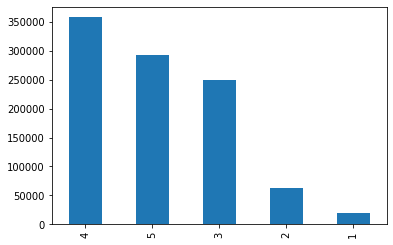

In [6]:
book_data.rating.value_counts().plot(kind='bar')
plt.show()

In [7]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(book_data[['book_id','user_id','rating']],reader)
data

In [8]:
# test train split
trainset, testset = train_test_split(data, test_size=0.20)

###  user based collabarative filtering

In [9]:
# setting k = 30 
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': True}
base_user = KNNBaseline(k=30,sim_options=sim_options)

In [10]:
base_user .fit(trainset)
base_user_preds = base_user.test(testset)
accuracy.rmse(base_user_preds)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8436


0.8435533908945605

###  Itembased collabarative filtering 

In [11]:
# setting K value to 30 
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': False}
base_item_1 = KNNBaseline(k=30,sim_options=sim_options)

In [12]:
base_item_1.fit(trainset)
base_item_1_preds = base_item_1.test(testset)
accuracy.rmse(base_item_1_preds)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8726


0.8726211893890723

In [13]:
base_item_1_preds[0]

Prediction(uid=2610, iid=45293, r_ui=4.0, est=3.8295894893667883, details={'actual_k': 2, 'was_impossible': False})

### Automatic cross validation by surprise

In [14]:
algo = SVD()

# Run 10_fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8418  0.8393  0.8425  0.8380  0.8412  0.8384  0.8409  0.8394  0.8394  0.8383  0.8399  0.0015  
MAE (testset)     0.6572  0.6558  0.6586  0.6536  0.6565  0.6546  0.6573  0.6562  0.6556  0.6541  0.6559  0.0015  
Fit time          72.28   73.65   70.20   79.14   79.07   76.46   68.79   76.25   72.31   73.31   74.14   3.33    
Test time         1.85    1.89    1.91    1.21    1.11    1.08    1.05    1.36    1.62    2.13    1.52    0.38    


{'test_rmse': array([0.84182206, 0.83925141, 0.84245025, 0.83795413, 0.84118542,
        0.83843788, 0.84085328, 0.83937497, 0.83943193, 0.83825895]),
 'test_mae': array([0.65724895, 0.6557762 , 0.65861927, 0.6535515 , 0.65645136,
        0.65459347, 0.65727818, 0.65617416, 0.65560601, 0.6541124 ]),
 'fit_time': (72.28147912025452,
  73.64768719673157,
  70.20278477668762,
  79.13590097427368,
  79.06676292419434,
  76.46243715286255,
  68.78604507446289,
  76.24547576904297,
  72.30970191955566,
  73.30531477928162),
 'test_time': (1.8519327640533447,
  1.8884460926055908,
  1.9118220806121826,
  1.212327003479004,
  1.1086759567260742,
  1.0847139358520508,
  1.0502102375030518,
  1.3557319641113281,
  1.6207420825958252,
  2.126101016998291)}

###  train the model using train data and prdict using test data 

In [15]:
algo = SVD()

In [16]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)
predictions 

[Prediction(uid=2610, iid=45293, r_ui=4.0, est=3.856130411649811, details={'was_impossible': False}),
 Prediction(uid=2602, iid=25578, r_ui=5.0, est=4.000094912644184, details={'was_impossible': False}),
 Prediction(uid=2316, iid=37420, r_ui=4.0, est=4.389671161808016, details={'was_impossible': False}),
 Prediction(uid=9021, iid=49554, r_ui=4.0, est=3.3010122859279867, details={'was_impossible': False}),
 Prediction(uid=8161, iid=19120, r_ui=3.0, est=4.501697368464742, details={'was_impossible': False}),
 Prediction(uid=3022, iid=9971, r_ui=5.0, est=4.235308693939788, details={'was_impossible': False}),
 Prediction(uid=2492, iid=37700, r_ui=5.0, est=4.42694814429726, details={'was_impossible': False}),
 Prediction(uid=9196, iid=10033, r_ui=5.0, est=3.8562352143226963, details={'was_impossible': False}),
 Prediction(uid=1145, iid=13826, r_ui=3.0, est=2.6007169271305908, details={'was_impossible': False}),
 Prediction(uid=260, iid=11445, r_ui=3.0, est=3.47446437430195, details={'was_imp

In [17]:
# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.8458


0.8457895032805477

###  Comparing accuracy by applying 3 diffrent methodology
#### Collabarative filtering (user based): 0.8435
#### Collabarative filtering(itembased): 0.87
#### Matrix factorisation(svd): 0.8458

we can see from above rmse score that userbased and svd are performing closely.
However,it depends on the data set it may vary in diffrent dataset.so the perfomace score is limited to this dataset 
and here we can conclude that Collabarative filtering (user based) is best for this senario.



###  AUC and ROC curve

In [18]:
# method to plot a roc curve 
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)
    

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    


In [19]:
# converting continious rating to labael attributes to draw roc curve 
def covert_rating(row):
    if row['rating']>2.5:
        return 1
    else:
        return 0

In [20]:
df_book = book_data.set_index(['book_id'])
df_book['rating'] = df_book.apply(covert_rating,axis=1)
df_b= df_book.reset_index()

reader = Reader(rating_scale=(0, 1))
data= Dataset.load_from_df(df_b[['book_id', 'user_id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.20)
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)
pred = pd.DataFrame(predictions)
fpr, tpr, thresholds = metrics.roc_curve(pred['r_ui'], pred['est'])

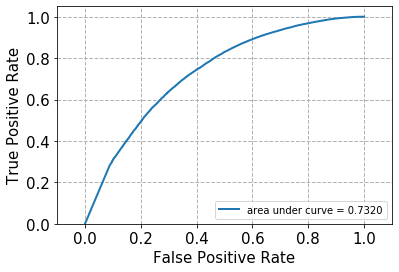

In [21]:
plot_roc(fpr,tpr)

In [148]:
# setting K value to 30 
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': False}
base_item_1 = KNNBaseline(k=30,sim_options=sim_options)

In [149]:
base_item_1.fit(trainset)
base_item_1_preds = base_item_1.test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [150]:
pred = pd.DataFrame(base_item_1_preds)
fpr1, tpr1, thresholds = metrics.roc_curve(pred['r_ui'], pred['est'])

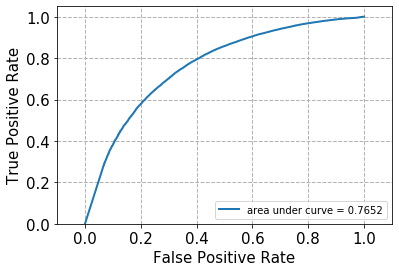

In [151]:
plot_roc(fpr1,tpr1)

In [22]:
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': True}
base_user = KNNBaseline(k=30,sim_options=sim_options)

In [23]:
base_user.fit(trainset)
base_user= base_user.test(testset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [24]:
pred = pd.DataFrame(base_user)
fpr, tpr, thresholds = metrics.roc_curve(pred['r_ui'], pred['est'])

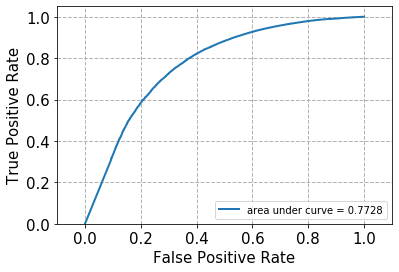

In [25]:
plot_roc(fpr,tpr)

### AUC curve and best model 

AUC–ROC curve is the model selection metric for bi–multi class classification problem.
ROC is a probability curve for different classes and tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

when the area under the curve(AUC) = 1 then that is the best case senario.
AUC is 0.5 means model is 50% accurate for instances and their classification. The model has no discrimination capabilities at all in this case.

ACU = 0 model is predicting opposite of what is expected.
As we can see above all the roc curve > 0.7 so they are able to predict 70 percent correctly 
and error rate is or the loss function is 0.3.
user_based collabarative filltering is giving the hihest area of curve.


### Implement support for at least one business or user experience goal such as increased serendipity, novelty, or diversity.
most of the time populat item will cretae bias on recomendation system as they will have high weight on data
and mislead the outcome. 
so we will find out 10 highly populat item and remove those item from book_data df and apply userbased collabarative filtering and analysis the result what we get before and now.


In [26]:
# finding top 10 gighly popular book
group_by_book_id = book_data.groupby("book_id")["rating"].mean()
top_10 = group_by_book_id.sort_values(ascending=False)
top_10 = top_10[:10]
top_10_df = top_10.to_frame()
top_10_df =top_10_df.reset_index()
highly_popular_book = list(top_10_df["book_id"])
highly_popular_book

[7947, 6920, 5207, 9566, 8946, 6361, 3275, 5580, 6590, 4483]

In [27]:
# remove popular book_id and crete a new data frame
book_data_remove_popular = book_data[~book_data['book_id'].isin(highly_popular_book)]

In [28]:
# check for popular book_id = 6920
book_data_remove_popular[book_data_remove_popular.book_id == 6920]

,book_id,user_id,rating


In [29]:
book_data_remove_popular[book_data_remove_popular.book_id == 7947]

,book_id,user_id,rating


In [30]:
# original size
book_data.size 

2945268

In [31]:
# reduced size
book_data_remove_popular.size

2942325

###  Apply UBC model on new reduced dataset

In [32]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(book_data_remove_popular[['book_id','user_id','rating']],reader)
data

In [33]:
trainset, testset = train_test_split(data, test_size=0.20)

In [34]:
sim_options = {'name': 'pearson_baseline',
               'min_support': 5,
               'user_based': True}
base_user = KNNBaseline(k=30,sim_options=sim_options)

In [35]:
base_user.fit(trainset)
base_user= base_user.test(testset)
accuracy.rmse(base_user_preds)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8436


0.8435533908945605

### Compare and report on any change in accuracy before and after removing most popular book 
Collabarative filtering (user based): 0.8435533908945605(initially)
0.8435533908945605(after change)
So there is no chage in accuracy, as we just removed only 10 popular book. But,in real world senario it will 
definitely make a difference.

### conclusion 

In the above discussion we have only discussed about offline data. However,in real world senario both evalute online 
and also offline data.

For online evaluation, an engine was developed to randomly split users traffic and assign to one of the experiments
of the hybrid recommender system (A/B testing), each varying only one setting of the two component algorithms. 

The Click-Through Rate (CTR) metric was also used to measure online accuracy of recommendations. Online CTR
was the ratio of interactions on recommended items and the total of recommended items viewed by users during their
sessions. 

How to mesure accuracy of CTR:
1. by taking both whole data set 
2. Ignoreing the popular items 

observe the curve if they go parally then we stop and release model. Because,model is behaving as expected and both online and offline evaluation is predicting in similar way.  if online recomendation and offline recommendation curve will inresect then there is someting wrong in the algorithm  and   we need to rebuild the model or try to change parameters.
